<a href="https://colab.research.google.com/github/eilinluna16/Fisicoquimica-Computacional/blob/master/Tarea_1_M%C3%A9todo_Variacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Variacional

La solución analítica exacta de la ecuación de Schrödinger es posible en pocos casos. Incluso, la solución numérica directa por integración a menudo no es factible en la práctica, especialmente en sistemas con más de una partícula. Sin embargo, existen métodos aproximados extremadamente útiles que, en muchos casos, pueden reducir el problema a uno mucho más simple. A continuación se considera el método variacional el cual constituye, junto con aproximaciones adecuadas para las interacciones electrón-electrón, la base para la mayoría de los enfoques prácticos para la solución de la ecuación de Schrödinger en la física de la materia condensada tales como Partículas en una caja (PIB), Oscilador armónico (HO), Rotor rígido (RR) y el átomo de hidrógeno.

El método variacional es una forma de encontrar aproximaciones al estado propio o estado más bajo de energía y algunos estados excitados de baja altitud. Esto permite calcular funciones de onda aproximadas, como los orbitales moleculares. La base de este método es el principio variacional, el cuál afirma que la energía de una funcion de prueba es una cota superior a la energía exacta del sistema: 

$$ E_\phi = \frac{\int \phi^* H \phi d\tau}{\int \phi^* \phi d\tau} \geq E_0 $$


El método consiste en elegir una "función de onda de prueba" en función de uno o más parámetros, y encontrar los valores de estos para los cuales la energía es la más baja posible. La función de onda obtenida al fijar los parámetros a dichos valores es entonces, una aproximación a la función de onda del estado fundamental (el estado de equilibrio de energía más bajo),  y el valor de expectativa de la energía en ese estado es un límite superior a la energía del estado fundamental.

## El átomo de hidrógeno

Dado que el átomo de hidrógeno contiene un núcleo y un electrón, la mecánica cuántica permite predecir la probabilidad de encontrar el electrón a cualquier distancia radial dada. Está dada por el cuadrado de la *función de onda*, que es una solución de la ecuación de Schrödinger. La función de onda del estado fundamental se conoce como la función de onda $1s$.

La función de onda puede ser separada en parámetros angulares y radiales. Por lo tanto, la función de onda radial, R(r), satisface la ecuación de Schrödinger radial:

$$ - \frac{\hbar^2}{2 \mu} \left( \frac {d^2 R(r)}{dr^2} + \frac{2}{r} \frac{d R(r)}{dr}  \right) + \frac{l(l+1)\hbar^2}{2 \mu ^2} R(r) - \frac {Z e^2}{4 \pi \epsilon_0 r } R(r) = E R(r)$$

Donde $r$ es la distancia radial desde el núcleo (va desde cero a infinito) y $l$ es el número cuántico angular. La masa reducida del sistema protón-electrón, $\mu$, es aproximadamente igual a la masa del electrón $m_e$, así que, para simplificar, se establece en las soluciones posteriores. Para el átomo de hidrógeno, Z=1.

La solución o función variacional, $\Psi(r)$ debe satisfacer las condiciones de frontera del problema, específicamente $\Psi(r=\infty)=0$  y  $\Psi(r=0)\ es\ finito$ (Este podría ser cero, o diferente de cero). ¿Qué tipo de funciones podría ser esta?. Una función exponencial de $r$ podría tener la forma correcta siempre y cuando el exponencial solo tenga valores negativos. Así, una función de prueba razonable podría ser:

$$ \Psi(r) \approx e^{-\alpha r / a_0}$$

Donde $\alpha$ es el parámetro variacional y $a_0=\frac{4 \pi \epsilon_0 \hbar^2}{m_e^2}$ es el radio de Bohr.

### Implementación en Python

Ahora, se implementará una solución variacional usando esta función para el átomo de Hidrógeno ($Z=1$) con el número cuántico angular $l=0$. Se trabajarán con unidades atómicas donde, $\hbar=1$ , $m_e=1$, y $4 \pi \epsilon_0 = 1 $ y conociendo estos datos se descartarán en el algoritmo. De modo que:

$$ \hat{H} = - \frac{1}{2 \mu} \left( \frac{d^2}{dr^2} + \frac{2}{r} \frac{d}{dr} \right)+ \frac{l(l+l)}{2 \mu^2} - \frac{Z}{r} $$


In [0]:
from sympy import *
init_printing(use_unicode=True)

In [0]:
mu = 1.0  # Masa reducida
l = 0.0 # Numero cuantico angular
Z = 1.0 # Masa atómica

FunPrueba = lambda r,alpha: exp(-alpha*r)

def Energia_variacional(alpha):
    
    r = symbols('r')
    
    # Funcion de prueba
    R = FunPrueba(r, alpha)

    # Primera derivada de la funcion de prueba.
    d1R = diff(FunPrueba(r,alpha),r)
    
    # Segunda derivada de la funcion de prueba.
    d2R = diff(FunPrueba(r,alpha),r,2)
    
    RHR = r**2 *, R*(-1/(2*mu)*(d2R+2/r*d1R) + l*(l+1)/(2*mu*r**2)*R - Z/r*R)
    I1 = integrate(RHR, (r, 1e-6, oo))
    
    RR =  r**2 * R**2
    I2 = integrate(RR, (r, 1e-6, oo))
    
    return (4*pi*I1)/(4*pi*I2)

Tener en cuenta:

+ El límite inferior de integración no es 0 como en el caso exacto, sino un número muy pequeño debido a que los cálculos numéricos pueden generar errores cuando se divide por cero (en términos como 1/r).  


+ La multiplicación por $r^2$ en las integrales tanto del numerador como del denoinador; desde el término de integración polar esférica, la integración sobre las porciones angulares se realiza analíticamente, produciendo los términos de 4pi en el numerador y el denominador. Los he incluido aquí como un recordatorio para usted acerca de la integración, pero en la práctica podrían ser omitidos del cálculo numérico.  


+ El ejemplo aquí es algo ineficaz, ya que la Energía_variacional($\alpha$) genera los derivados de la FunciónPrueba cada vez que se llama a i. Para problemas más exigentes, se desea evaluarlos solo una vez, pero para el caso no es necesario y el código es más sencillo.

## Minimización del parámetro variacional

Dado que $\alpha$ es el único parámetro variacional, una forma sencilla de encontrar el valor óptimo del parámetro es trazar la energía_variacional como una función del parámetro alfa y luego observar el resultado para determinar un aproximado del mínimo:

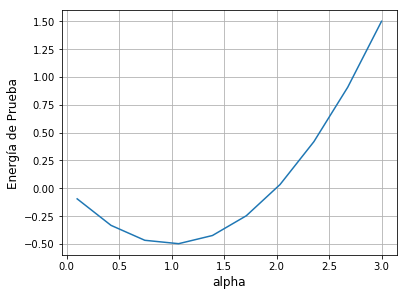

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,3.0,10)
y= [Energia_variacional(i) for i in x]

plt.figure(figsize=(6,4.5))
plt.plot(x,y)
plt.xlabel('alpha', fontsize=12)
plt.ylabel('Energía de Prueba', fontsize=12)
plt.grid()
plt.show()

El mínimo parece ser aproximadamente a = 1, pero se puede determinar el valor de manera más precisa utilizando el siguiente código. El gráfico indica que el mínimo está entre $0.5<\alpha<11.5$; y esto especifica un rango de búsqueda que acelera el proceso de minimización.

In [0]:
alpha = symbols('alpha')
f = Energia_variacional(alpha)
r = solve(f.diff(alpha), alpha)
f = f.subs(alpha, r[0])
print("alpha="+str(r[0]), "Etrial="+str(f))

alpha=1.00000000000200 Etrial=-0.500000000000000


Esto da el resultado exacto $\alpha = Z = 1$ y la energía exacta (-0.5 hartree); la primera conjetura "para la secuencia de prueba fue la solución de estado fundamental exacto.